<a href="https://colab.research.google.com/github/sergioGarcia91/BucaramangaSeismicNest_ML/blob/main/ML_SismosNido_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

New models will be trained, this time considering up to 6 hidden layers. Starting in 2009, the model will start at magnitudes of 2.5 and will target 4.5.

# Start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Para evaluar el modelo
from sklearn.neural_network import MLPClassifier # Para la Red Neuronal
from joblib import dump, load # guardar el modelo
from datetime import datetime, timedelta
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression # Para generar el Modelo de Reg. Lineal

In [ ]:
pathDatos = '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/Catalogos/'

# MLPClass Training

The layers of the 8 models that obtained outstanding results during the training of version 1 will be analyzed. The score is required to be greater than 0.9.

```python
[2000, 1000, 500, 250, 125, 5]
[1500, 750, 375, 188, 94, 5]
[420, 210, 105, 53, 27, 5]
[210, 105, 53, 27, 13, 5] # esta 5 veces
```

2009_12meses 

----  [2000, 1000, 500, 250, 125, 5]

  0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  382.8986278629998
Score:  0.8581204379562044


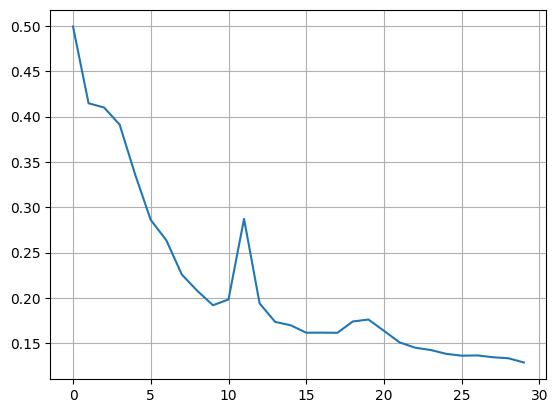


  1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  345.97244862299976
Score:  1.0


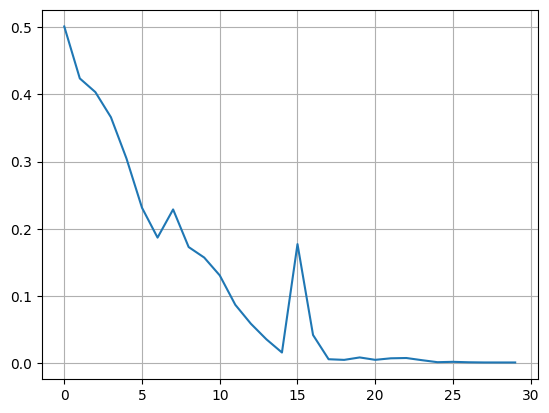

2009_12meses_hl_2000_1000_500_250_125_5_int1_scr1.0.joblib
----  [1500, 750, 375, 188, 94, 5]

  0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  226.5708380369997
Score:  0.999315693430657


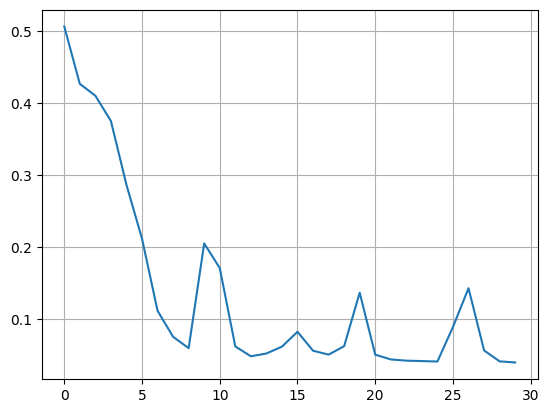

2009_12meses_hl_1500_750_375_188_94_5_int0_scr0.999.joblib
----  [420, 210, 105, 53, 27, 5]

  0
Segundos empleados:  39.805518035000205
Score:  1.0


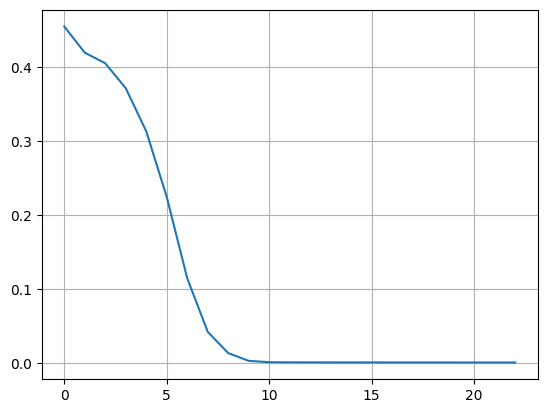

2009_12meses_hl_420_210_105_53_27_5_int0_scr1.0.joblib
----  [210, 105, 53, 27, 13, 5]

  0
Segundos empleados:  25.368156260000433
Score:  1.0


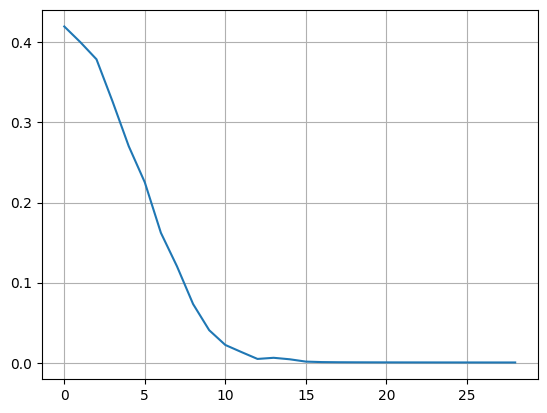

2009_12meses_hl_210_105_53_27_13_5_int0_scr1.0.joblib


In [ ]:
# Se cargan los archivos
#prefijo = '2009_30dias'
#prefijo = '2009_6meses'
prefijo = '2009_12meses'

X2022 = np.loadtxt(pathDatos + prefijo + '_X2022.txt')
y2022 = np.loadtxt(pathDatos + prefijo + '_y2022.txt')
X2021 = np.loadtxt(pathDatos + prefijo + '_X2021.txt')
y2021 = np.loadtxt(pathDatos + prefijo + '_y2021.txt')

letras = prefijo
pathSave = '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/ModelosMLP_Class_v6/'
# Propuesta de 4 estructuras considerando los 8 modelos anteriores
estuctura = [[2000, 1000, 500, 250, 125, 5],
             [1500, 750, 375, 188, 94, 5],
             [420, 210, 105, 53, 27, 5],
             [210, 105, 53, 27, 13, 5]]

scoreInteres = 0.9
intentos = 5
print(prefijo, '\n')
for hl in estuctura:
  print('---- ',hl)

  c = 0

  while c <= intentos:
    print('\n ', c)

    modelo_MLPClass = MLPClassifier(hidden_layer_sizes=tuple(hl),
                                    activation='relu', #identity, logistic, tanh, relu
                                    early_stopping=False,
                                    solver='adam',
                                    max_iter=30)#, random_state= 0)
    # Se entrena
    tinicio = time.perf_counter() # Segundos

    modelo_MLPClass.fit(X2021, y2021)

    tfinal = time.perf_counter() # Segundos
    tiempo = tfinal - tinicio

    print('Segundos empleados: ',tiempo)

    scoreMLPClass = modelo_MLPClass.score(X2021, y2021)
    print('Score: ', scoreMLPClass)

    plt.figure()
    plt.plot(np.arange(len(modelo_MLPClass.loss_curve_)),
            modelo_MLPClass.loss_curve_)
    plt.grid()
    plt.show()

    if scoreMLPClass >= scoreInteres:
      # guardar modelo
      Name = letras + f'_hl_{hl[0]}_{hl[1]}_{hl[2]}_{hl[3]}_{hl[4]}_{hl[5]}_int' + str(c) + '_scr' + str(round(scoreMLPClass, 3)) + '.joblib'
      dump(modelo_MLPClass, pathSave+Name)
      print(Name)
      break

    if c == intentos:
      print('Nada ...')
    c += 1

# Training - Bootstrapping

The training targets will be doubled to give it more weight and reduce the imbalance.

This time, early stopping = `True` will be enabled.

The score will be reduced to 0.80.

At 6 months it was `False`. Therefore, for 12 months the same.


Cantidad 0=  3762
Cantidad 1=  3732
Dif =  30
2009_12meses_boots 

----  [2000, 1000, 500, 250, 125, 5]

  0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  584.8307925529998
Score:  0.49799839871897517


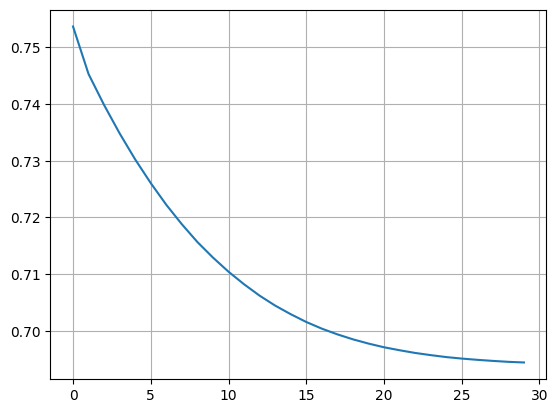


  1
Segundos empleados:  587.2646851210002
Score:  1.0


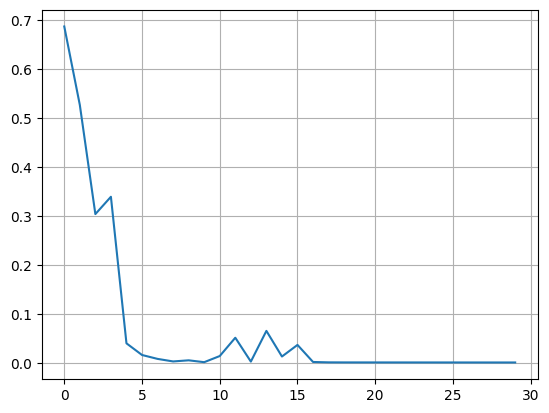

2009_12meses_boots_hl_2000_1000_500_250_125_5_int1_scr1.0.joblib
----  [1500, 750, 375, 188, 94, 5]

  0
Segundos empleados:  159.93729012200038
Score:  0.5020016012810248


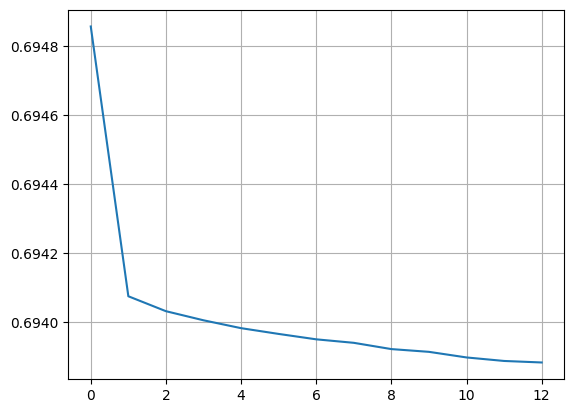


  1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  367.5642780479993
Score:  0.991860154790499


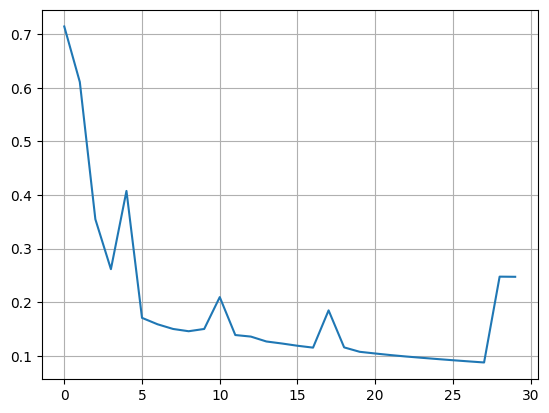

2009_12meses_boots_hl_1500_750_375_188_94_5_int1_scr0.992.joblib
----  [420, 210, 105, 53, 27, 5]

  0
Segundos empleados:  52.811858979000135
Score:  1.0


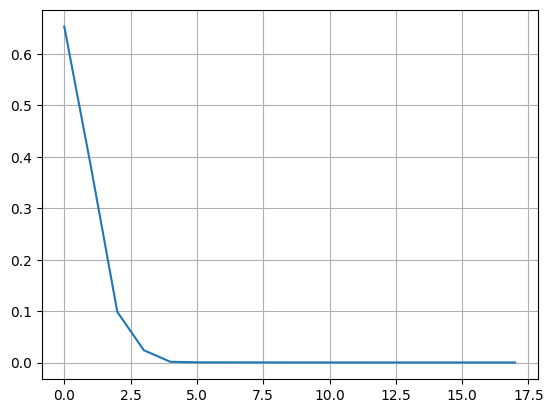

2009_12meses_boots_hl_420_210_105_53_27_5_int0_scr1.0.joblib
----  [210, 105, 53, 27, 13, 5]

  0
Segundos empleados:  34.89599275100045
Score:  0.5020016012810248


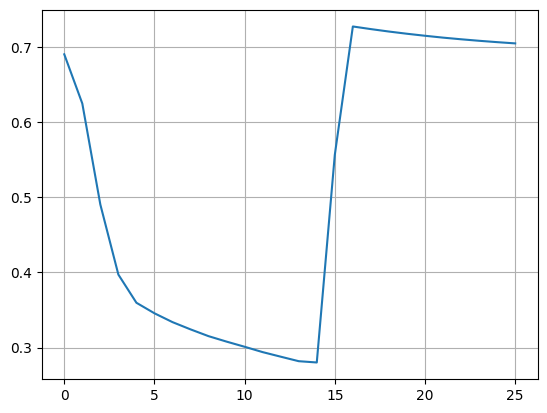


  1
Segundos empleados:  35.195293377999405
Score:  1.0


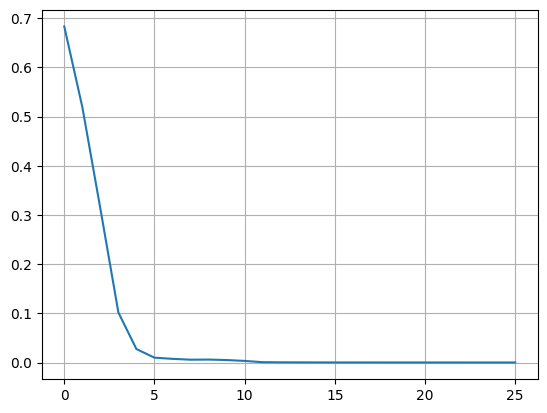

2009_12meses_boots_hl_210_105_53_27_13_5_int1_scr1.0.joblib


In [ ]:
# Se cargan los archivos
#prefijo = '2009_30dias'
#prefijo = '2009_6meses'
prefijo = '2009_12meses'

X2022 = np.loadtxt(pathDatos + prefijo + '_X2022.txt')
y2022 = np.loadtxt(pathDatos + prefijo + '_y2022.txt')
X2021 = np.loadtxt(pathDatos + prefijo + '_X2021.txt')
y2021 = np.loadtxt(pathDatos + prefijo + '_y2021.txt')

unido = np.concatenate([X2021, y2021.reshape(-1,1)], axis=1)
solo_1 = unido[unido[:,-1] == 1].copy()
cantidad_0 = unido.shape[0] - solo_1.shape[0]
cantidad_1 = solo_1.shape[0]
divi_0_1 = int(np.round(cantidad_0 / cantidad_1)) - 1

solo_1_boors = np.tile(solo_1, (divi_0_1, 1))
unido2 = np.concatenate([unido, solo_1_boors], axis=0)

X2021 = unido2[:,:-1]
y2021 = unido2[:,-1]

print('Cantidad 0= ', (y2021 == 0).sum())
print('Cantidad 1= ', (y2021 == 1).sum())
print('Dif = ', (y2021 == 0).sum() - (y2021 == 1).sum())


letras = prefijo + '_boots'
pathSave = '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/ModelosMLP_Class_v6/'
# Propuesta de 4 estructuras considerando los 8 modelos anteriores
estuctura = [[2000, 1000, 500, 250, 125, 5],
             [1500, 750, 375, 188, 94, 5],
             [420, 210, 105, 53, 27, 5],
             [210, 105, 53, 27, 13, 5]]

scoreInteres = 0.8
intentos = 5
print(letras, '\n')
for hl in estuctura:
  print('---- ',hl)

  c = 0

  while c <= intentos:
    print('\n ', c)

    modelo_MLPClass = MLPClassifier(hidden_layer_sizes=tuple(hl),
                                    activation='relu', #identity, logistic, tanh, relu
                                    early_stopping=False,
                                    solver='adam',
                                    max_iter=30)#, random_state= 0)
    # Se entrena
    tinicio = time.perf_counter() # Segundos

    modelo_MLPClass.fit(X2021, y2021)

    tfinal = time.perf_counter() # Segundos
    tiempo = tfinal - tinicio

    print('Segundos empleados: ',tiempo)

    scoreMLPClass = modelo_MLPClass.score(X2021, y2021)
    print('Score: ', scoreMLPClass)

    plt.figure()
    plt.plot(np.arange(len(modelo_MLPClass.loss_curve_)),
            modelo_MLPClass.loss_curve_)
    plt.grid()
    plt.show()

    if scoreMLPClass >= scoreInteres:
      # guardar modelo
      Name = letras + f'_hl_{hl[0]}_{hl[1]}_{hl[2]}_{hl[3]}_{hl[4]}_{hl[5]}_int' + str(c) + '_scr' + str(round(scoreMLPClass, 3)) + '.joblib'
      dump(modelo_MLPClass, pathSave+Name)
      print(Name)
      break

    if c == intentos:
      print('Nada ...')
    c += 1

# Training - Bootstrapping - 2 layers

It will be trained the same as the previous one but maintaining the 2 original layers.

Cantidad 0=  3762
Cantidad 1=  3732
Dif =  30
2009_12meses_boots 

----  [2000, 5]

  0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  386.3188508209996
Score:  0.5020016012810248


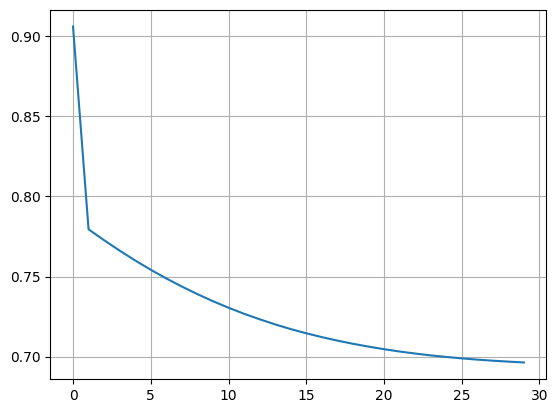


  1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  388.2168213390005
Score:  0.9714438217240459


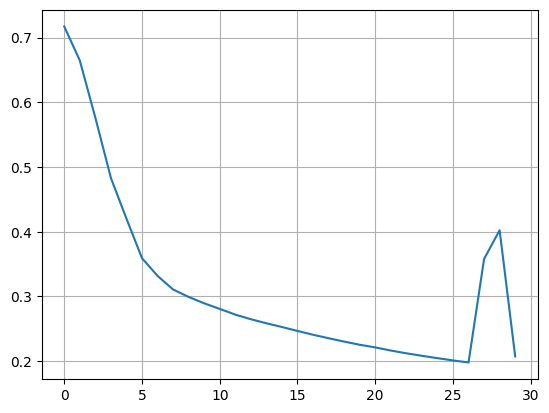

2009_12meses_boots_hl_2000_5_int1_scr0.971.joblib
----  [1500, 5]

  0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  246.74769078099962
Score:  0.49799839871897517


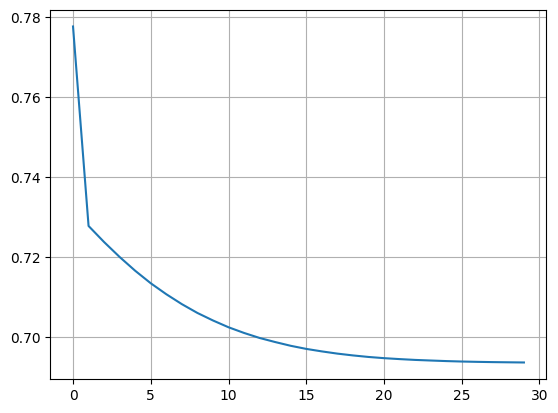


  1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  244.87445397200008
Score:  0.49799839871897517


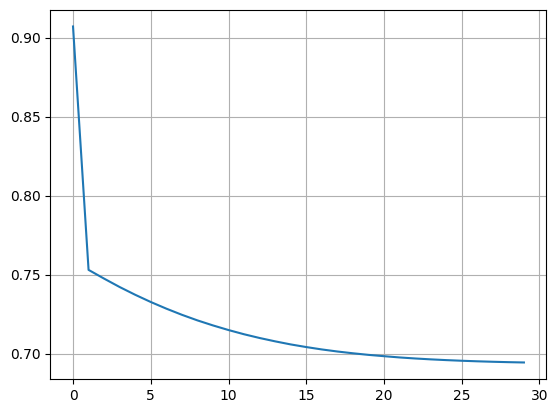


  2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  245.53901849900012
Score:  0.5020016012810248


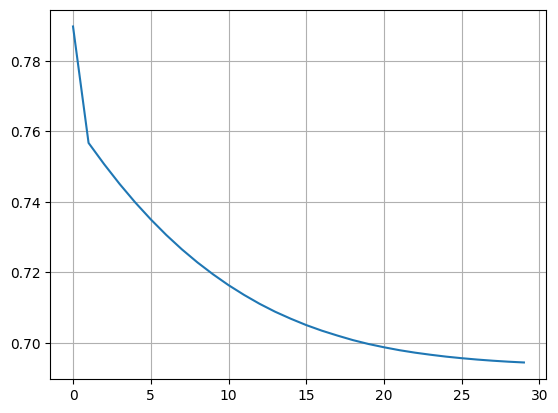


  3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  244.0385007929999
Score:  0.5020016012810248


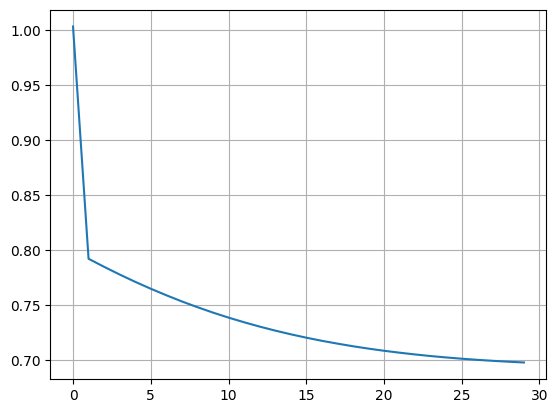


  4


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  245.2266389919996
Score:  0.9934614358153189


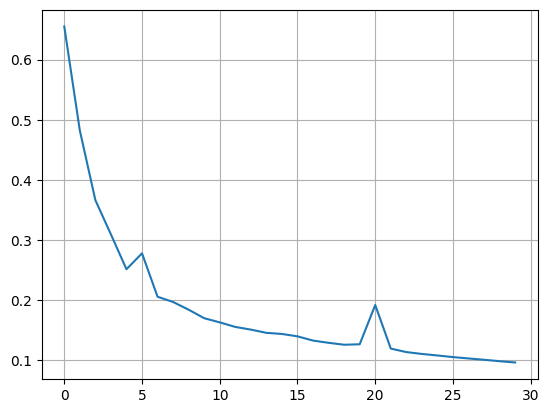

2009_12meses_boots_hl_1500_5_int4_scr0.993.joblib
----  [420, 5]

  0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  72.92223988600017
Score:  0.9823859087269816


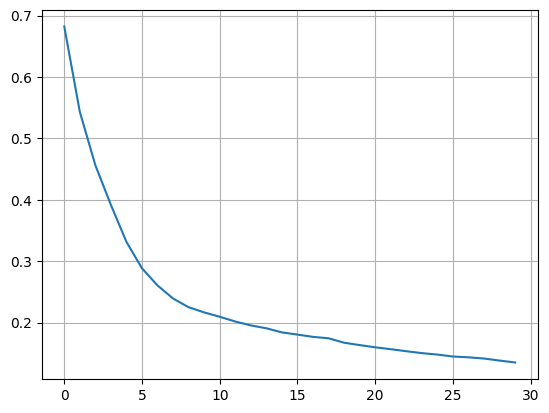

2009_12meses_boots_hl_420_5_int0_scr0.982.joblib
----  [210, 5]

  0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Segundos empleados:  37.95582709299924
Score:  0.995329597010942


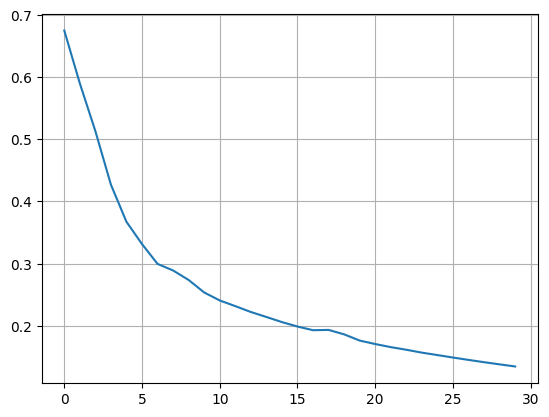

2009_12meses_boots_hl_210_5_int0_scr0.995.joblib


In [ ]:
# Se cargan los archivos
#prefijo = '2009_30dias'
#prefijo = '2009_6meses'
prefijo = '2009_12meses'

X2022 = np.loadtxt(pathDatos + prefijo + '_X2022.txt')
y2022 = np.loadtxt(pathDatos + prefijo + '_y2022.txt')
X2021 = np.loadtxt(pathDatos + prefijo + '_X2021.txt')
y2021 = np.loadtxt(pathDatos + prefijo + '_y2021.txt')

unido = np.concatenate([X2021, y2021.reshape(-1,1)], axis=1)
solo_1 = unido[unido[:,-1] == 1].copy()
cantidad_0 = unido.shape[0] - solo_1.shape[0]
cantidad_1 = solo_1.shape[0]
divi_0_1 = int(np.round(cantidad_0 / cantidad_1)) - 1

solo_1_boors = np.tile(solo_1, (divi_0_1, 1))
unido2 = np.concatenate([unido, solo_1_boors], axis=0)

X2021 = unido2[:,:-1]
y2021 = unido2[:,-1]

print('Cantidad 0= ', (y2021 == 0).sum())
print('Cantidad 1= ', (y2021 == 1).sum())
print('Dif = ', (y2021 == 0).sum() - (y2021 == 1).sum())


letras = prefijo + '_boots'
pathSave = '/content/drive/MyDrive/Manuscritos_Investigacion/ML_SismosNidoBucaramanga/ModelosMLP_Class_v6/'
# Propuesta de 4 estructuras considerando los 8 modelos anteriores
estuctura = [[2000, 5],
             [1500, 5],
             [420, 5],
             [210, 5]]

scoreInteres = 0.8
intentos = 5
print(letras, '\n')
for hl in estuctura:
  print('---- ',hl)

  c = 0

  while c <= intentos:
    print('\n ', c)

    modelo_MLPClass = MLPClassifier(hidden_layer_sizes=tuple(hl),
                                    activation='relu', #identity, logistic, tanh, relu
                                    early_stopping=False,
                                    solver='adam',
                                    max_iter=30)#, random_state= 0)
    # Se entrena
    tinicio = time.perf_counter() # Segundos

    modelo_MLPClass.fit(X2021, y2021)

    tfinal = time.perf_counter() # Segundos
    tiempo = tfinal - tinicio

    print('Segundos empleados: ',tiempo)

    scoreMLPClass = modelo_MLPClass.score(X2021, y2021)
    print('Score: ', scoreMLPClass)

    plt.figure()
    plt.plot(np.arange(len(modelo_MLPClass.loss_curve_)),
            modelo_MLPClass.loss_curve_)
    plt.grid()
    plt.show()

    if scoreMLPClass >= scoreInteres:
      # guardar modelo
      Name = letras + f'_hl_{hl[0]}_{hl[1]}_int' + str(c) + '_scr' + str(round(scoreMLPClass, 3)) + '.joblib'
      dump(modelo_MLPClass, pathSave+Name)
      print(Name)
      break

    if c == intentos:
      print('Nada ...')
    c += 1

# End